In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

In [2]:
data1=pd.read_csv('MvsHall.csv')

In [3]:
data1.head()

,I_A,Mag_H,mV
0,0.0,60.0,0.13
1,0.1,164.0,2.10
2,0.2,265.0,3.90
3,0.3,373.0,5.70
4,0.4,466.0,7.60


Text(0, 0.5, 'mV')

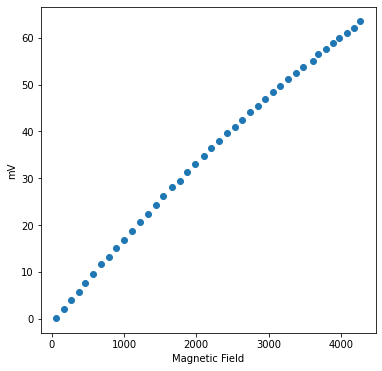

In [4]:
plt.plot(data1['Mag_H'],data1['mV'],'o')
plt.xlabel('Magnetic Field')
plt.ylabel('mV')

#### Fitting the line

In [5]:
from scipy.optimize import curve_fit
x_vals = data1['Mag_H']
y_vals = data1['mV']
#ProbeCurrent 
I= 0.004
def obj(x,m):
    return (m*x)

popt,_ = curve_fit(obj,x_vals,y_vals)
m=popt
print("V = %.5f*H" %(m))
print("slope = ",m)

V = 0.01559*H
slope =  [0.01559398]


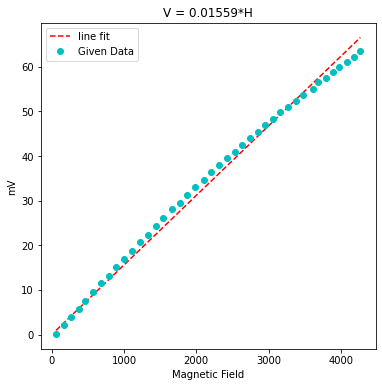

In [6]:
x= data1['Mag_H']
y=m*x
plt.plot(x,y,'--',color='red',label= "line fit")
plt.plot(data1['Mag_H'],data1['mV'],'o',color='c',label="Given Data") 
plt.title("V = 0.01559*H")
plt.legend(loc="upper left")
plt.xlabel('Magnetic Field')
plt.ylabel('mV')
plt.show()

Calculating the Hall coefficient 
$R_{h} = \frac{V_{y}t}{IH}$ 

t= thickness = 0.5mm,  


$\mu_{o} = 12.57 × 10-7 H/m$

Slope = 0.01559398 

Slope = $\frac{R_{h}I}{t}$

$R_{h} = \frac{Slope*t}{I}$

In [7]:
Rh = (m*0.005)/0.004
Rh

array([0.01949248])

### $R_{h} = 0.01949248$

### Carrier Concentration $n_{e} = \frac{1}{R_{h}e} $

In [8]:
n = 1/(Rh*1.6*10**-19)
n

array([3.20636537e+20])

### Carrier concentration is
### $n = 3.206 * 10^{20} / m^3$

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_vals)
print('The Error in the fit is : ' ,mse)

The Error in the fit is :  2.4825577561902854


### The Error in the fit was 2.48

## Inversion of $R_{H}$

In [10]:
data2=pd.read_csv('HallvsTemp.csv')

In [11]:
data2.head()

,S.No.,Heater Current (mA),Thermo e.m.f (mV),Temp (C),Corrected Hall Voltage (mV),Hall coefficient (X103)(cm3.coulomb-1),Carrier_conc
0,1,0,0.00,20.0,50.8,1.978193,3.159449e+18
1,2,200,0.14,23.5,49.0,1.908100,3.275510e+18
2,3,300,0.32,28.0,48.6,1.892523,3.302469e+18
3,4,400,0.59,34.8,47.0,1.830218,3.414894e+18
4,5,500,0.98,44.8,43.9,1.709502,3.656036e+18


Text(0.5, 1.0, 'R_H vs T Hall inversion')

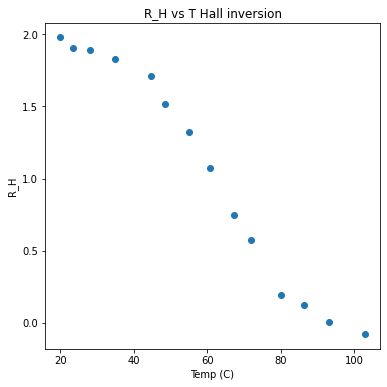

In [12]:
plt.plot(data2['Temp (C)'],data2['Hall coefficient (X103)(cm3.coulomb-1)'],'o')
plt.xlabel('Temp (C)')
plt.ylabel('R_H')
plt.title('R_H vs T Hall inversion')